56
(8, 8)


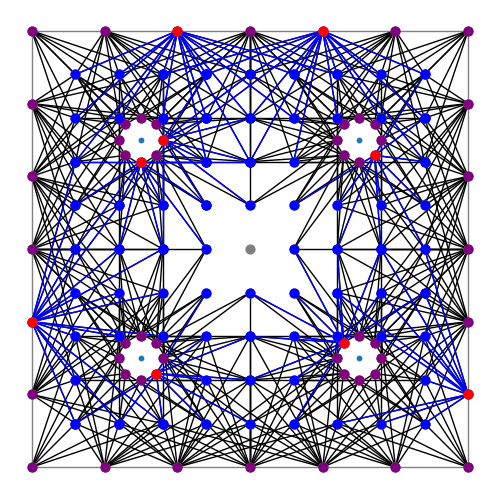

<Figure size 640x480 with 0 Axes>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
#from PuboOnGraph import Graph,listLidar,listCovering
from PuboOnSqArea import Graph,listPositionLidar as listLidar,listCovering
G = nx.Graph()
import os
from platform import node
import numpy as np
import qiskit_optimization
from docplex.mp.model import Model
from qiskit_optimization.problems import QuadraticProgram
import networkx as nx
import re

points1 = [] #placement of lidars for one side
points2 = [] #placement of lidars for other side
points3 = [] #vertices to cover

pointsL = listLidar
points3 = listCovering
G = Graph

#G.add_nodes_from(points1 + points2 + points3)

def showGraph(S):
    
    pos = {node: node for node in G.nodes()} 
    nx.draw(G, pos, with_labels=False, node_size=40)
    actE = []
    actN = []
    for node in S:
      for edge in G.edges(node):
        actE.append(edge)
      for node2 in G.neighbors(node):
        actN.append(node2)
    # Draw the graph
    pos = {node: node for node in G.nodes()}
    nx.draw(G, pos, with_labels=False,node_color = 'grey', node_size=40)
    nx.draw_networkx_nodes(G, pos, listLidar, node_color = 'purple', node_size= 40)
    nx.draw_networkx_nodes(G, pos, S, node_color='red', node_size=40)
    nx.draw_networkx_nodes(G, pos, actN, node_color='blue', node_size=40)
    nx.draw_networkx_nodes(G, pos, S, node_color='red', node_size=40)
    nx.draw_networkx_edges(G, pos, actE, edge_color='red', node_size=40)
    plt.show()

In [2]:
m = Model(name='BMW') 

x = m.binary_var_dict(pointsL, name='x')
m.objective_expr = sum(x[i] for i in pointsL)
m.objective_sense = 'min'

for node in points3:
    m.add_constraint(1 == sum(x[v] for v in G.neighbors(node)))

print(m.prettyprint())
m.export_as_lp(basename="BMW", path=os.path.abspath(""))

quadratic_program = QuadraticProgram()
quadratic_program.read_from_lp_file(os.path.join(os.path.abspath(""), 'BMW.lp'))
print(quadratic_program.prettyprint())

from qiskit_optimization import QuadraticProgram
from qiskit_optimization.converters import QuadraticProgramToQubo
import math
# qubo conversion
conv = QuadraticProgramToQubo()
qp = conv.convert(quadratic_program)

matrice = qp.objective.quadratic.coefficients.asformat("array")
diagonal = qp.objective.linear.coefficients.asformat("array")*1.3
# num = 0
# num1 = 0
for i in range (len(matrice)):
    # num1 = 0
    for j in range(len(matrice[i])):
        # num1 += 1
        if j == i:
            matrice[i][j] += diagonal[0][j]
    # num += 1
matrice2 = np.zeros((int(math.sqrt(len(matrice))+1)**2,int(math.sqrt(len(matrice))+1)**2))
matrice2[:len(matrice),:len(matrice)] = matrice
np.save("matrice_QUBO_Equal.npy",matrice2)


print(qp.objective.linear.to_array())
print(qp.objective.linear.coefficients)
print(qp.objective.quadratic.to_array())
print(qp.objective.quadratic.coefficients)


for n in qp.binary_var_dict(3).keys():
    print("n =", n)
for n in qp.integer_var_dict(3).items():
    print(n)
print(qp.prettyprint())

Error: Adding trivially infeasible constraint: '', pos: 38


DOcplexException: Adding a trivially infeasible constraint